In [101]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [82]:
df=pd.read_csv('data_income.csv')

In [83]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,52,Private,68982,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,1
43953,19,Private,116562,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,0
43954,30,Private,197947,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,58,United-States,0
43955,46,Private,97883,Bachelors,13,Never-married,Sales,Not-in-family,White,Female,0,0,35,United-States,0


## EDA [ Exploratory Data Analysis ] - Data Preparation Step

- Handle the missing value

- Univariate analysis via. Data Visualization

- Split the dataset into categorical and numerical values

- Converting categorical variables to numerical ( Dummy variables )

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              43957 non-null  int64 
 1   workclass        41459 non-null  object
 2   fnlwgt           43957 non-null  int64 
 3   education        43957 non-null  object
 4   educational-num  43957 non-null  int64 
 5   marital-status   43957 non-null  object
 6   occupation       41451 non-null  object
 7   relationship     43957 non-null  object
 8   race             43957 non-null  object
 9   gender           43957 non-null  object
 10  capital-gain     43957 non-null  int64 
 11  capital-loss     43957 non-null  int64 
 12  hours-per-week   43957 non-null  int64 
 13  native-country   43194 non-null  object
 14  income_>50K      43957 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.0+ MB


### Data types in data set:

- Categorical = 10
- Numerical = 5
- Target =1

1. Handling missing Value

In [35]:
df.isnull().sum()

age                   0
workclass          2498
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2506
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      763
income_>50K           0
dtype: int64

Missing values are all categorical variables.

For workclass, 2498 / 43957 = 0.05 ~5% of training data. Since missing values are 5% of training data, i'm going to drop them.

Likweise, i'm going to drop the missing values in all categorical variables except target variable (i.e.,income_>50k)

2. Univariate analysis via. Data Visualization

This will helps us to understand each feature and its distribution.

<Axes: xlabel='workclass', ylabel='count'>

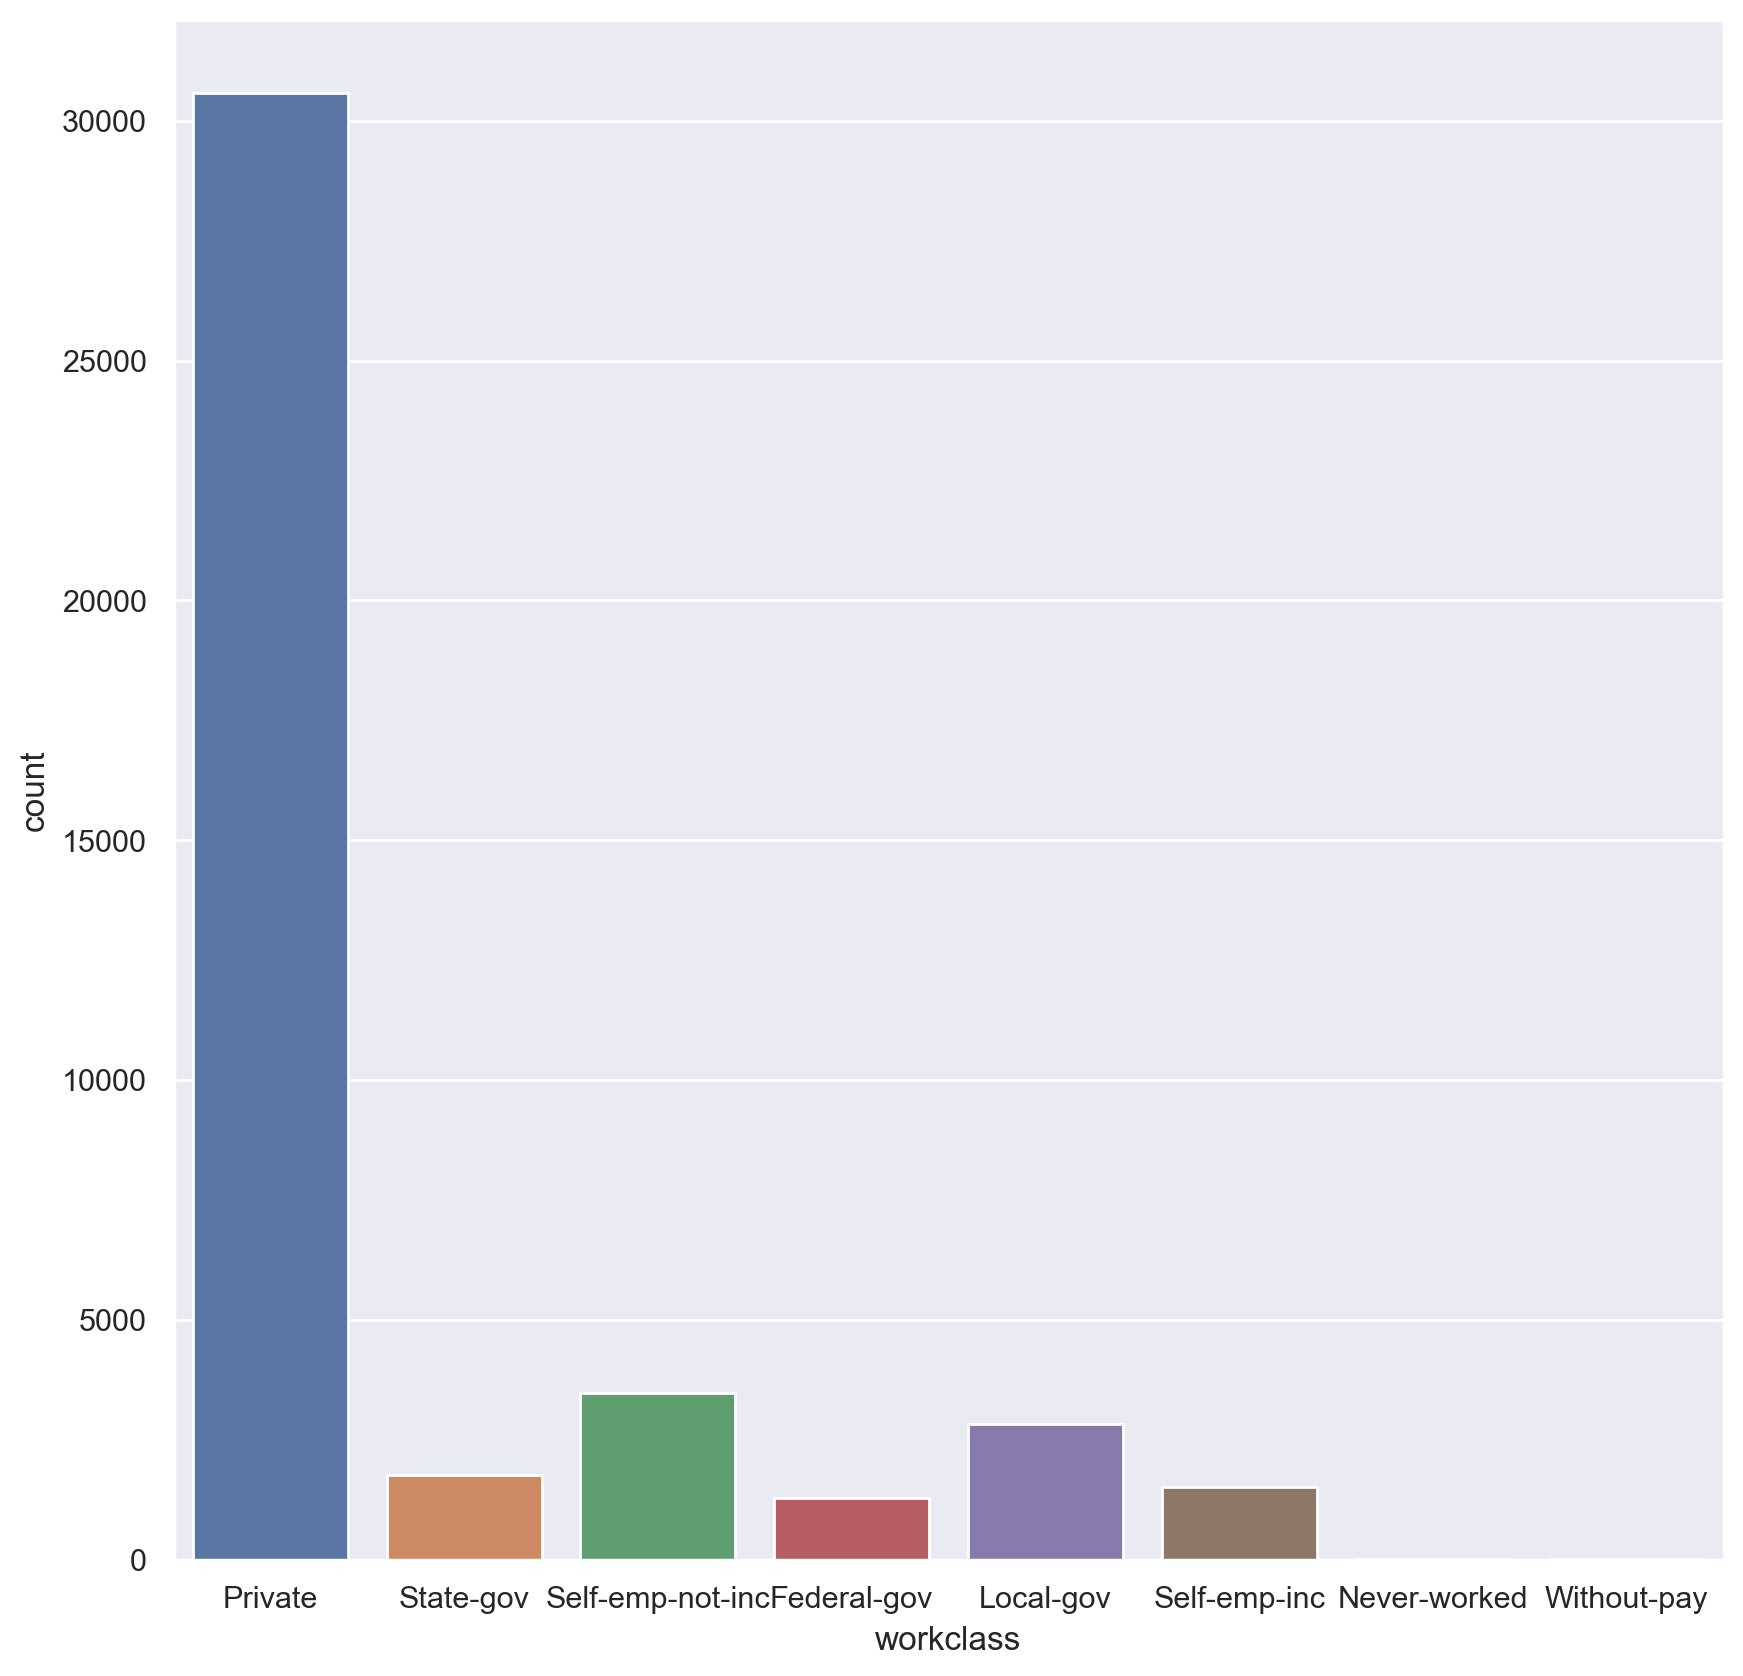

In [36]:
sns.set_theme(style="darkgrid")

#frequency distribution of work class
plt.figure(figsize=(10,10))
sns.countplot(data= df, x = df['workclass'])

In [ ]:
df.drop(df.index[df['workclass'] == 'Without-pay'], inplace=True)
df.shape

In [ ]:
df=df[df['native-country']=='United-States']
df.shape

In [ ]:
df=df.drop(columns='native-country',axis=1)
df.shape

In [ ]:
df['education'] = df['education'].replace(['1st-4th','5th-6th'],'elementary-school')
df['education'] = df['education'].replace(['7th-8th'],'middle-school')
df['education'] = df['education'].replace(['9th','10th','11th','12th'],'high-school')
df['education'] = df['education'].replace(['Doctorate','Bachelors','Some-college','Masters','Prof-school','Assoc-voc','Assoc-acdm'],'postsecondary-education')

<Axes: xlabel='education', ylabel='count'>

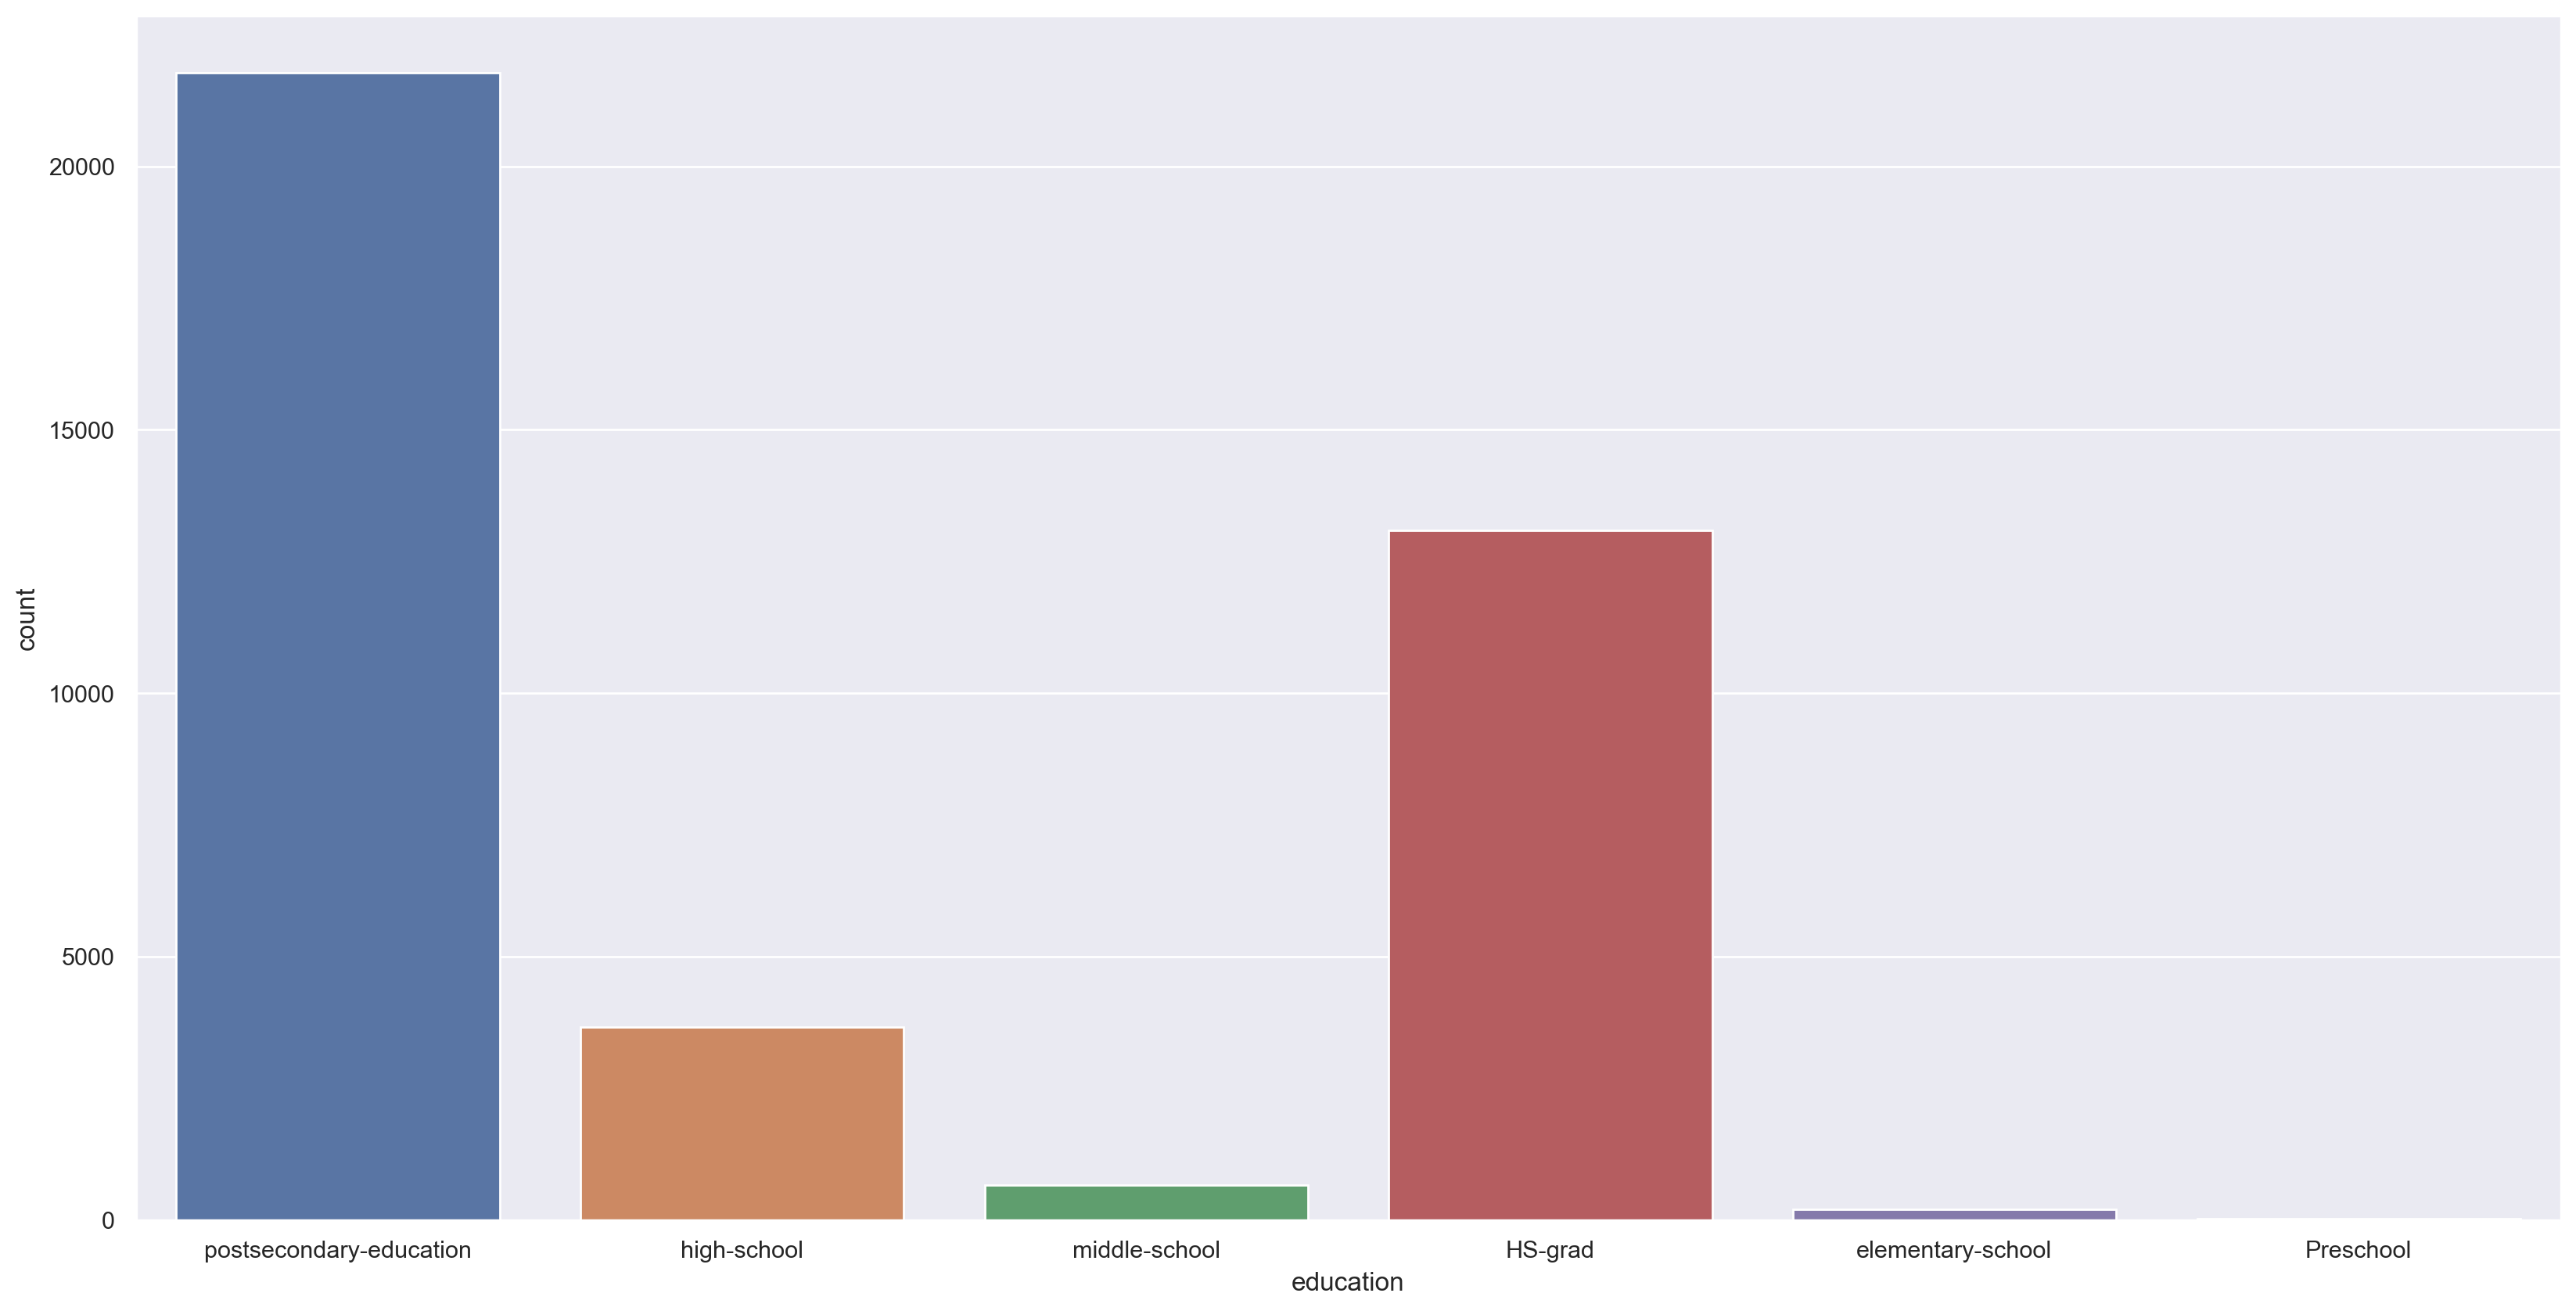

In [41]:
plt.figure(figsize=(20,10))
sns.countplot(data= df, x = "education")

In [88]:
df['marital-status'] = df['marital-status'].replace(['Divorced','Never-married','Widowed'],'single')
df['marital-status'] = df['marital-status'].replace(['Married-civ-spouse','Separated','Married-spouse-absent','Married-AF-spouse'],'married')

<Axes: xlabel='marital-status', ylabel='count'>

<Figure size 2000x1000 with 0 Axes>

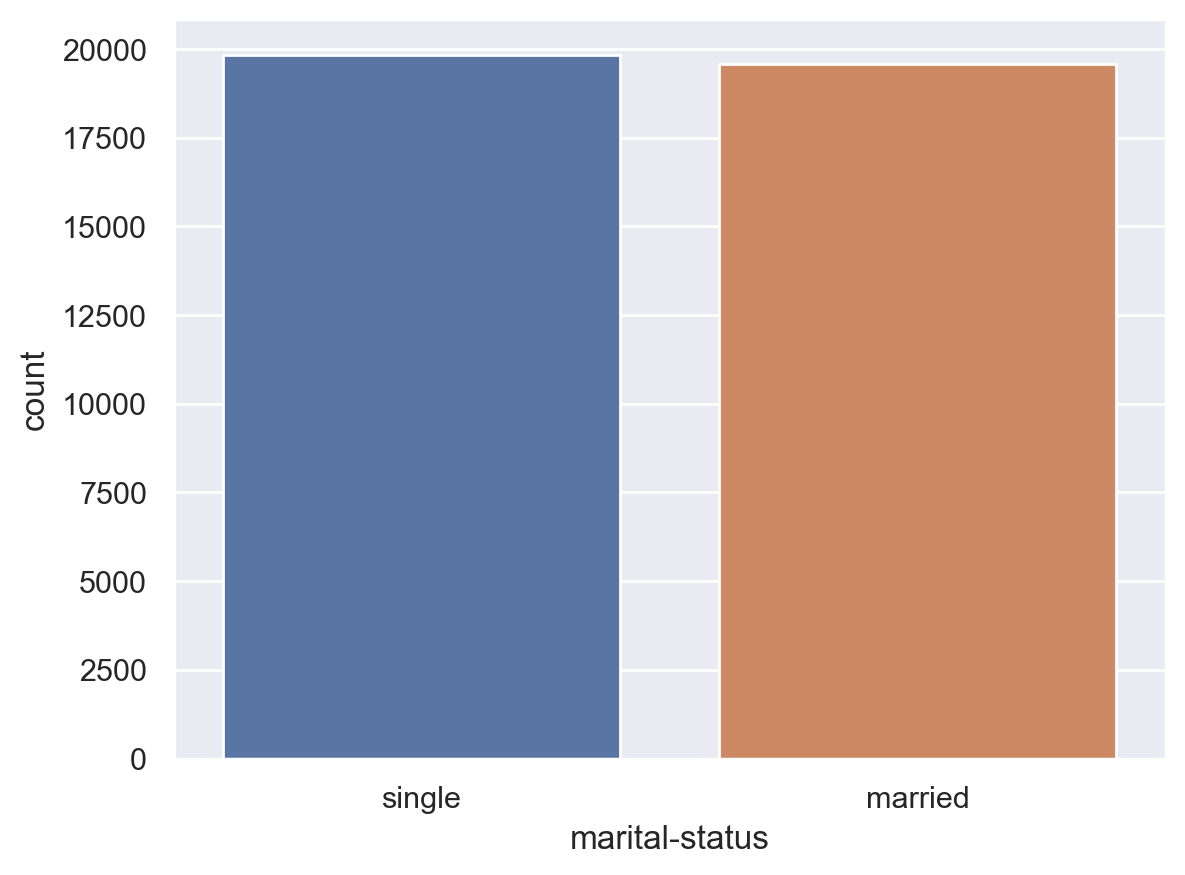

In [43]:
plt.figure(figsize=(20,10))
plt.figure()
sns.countplot(data= df, x = "marital-status")

<Axes: xlabel='count', ylabel='occupation'>

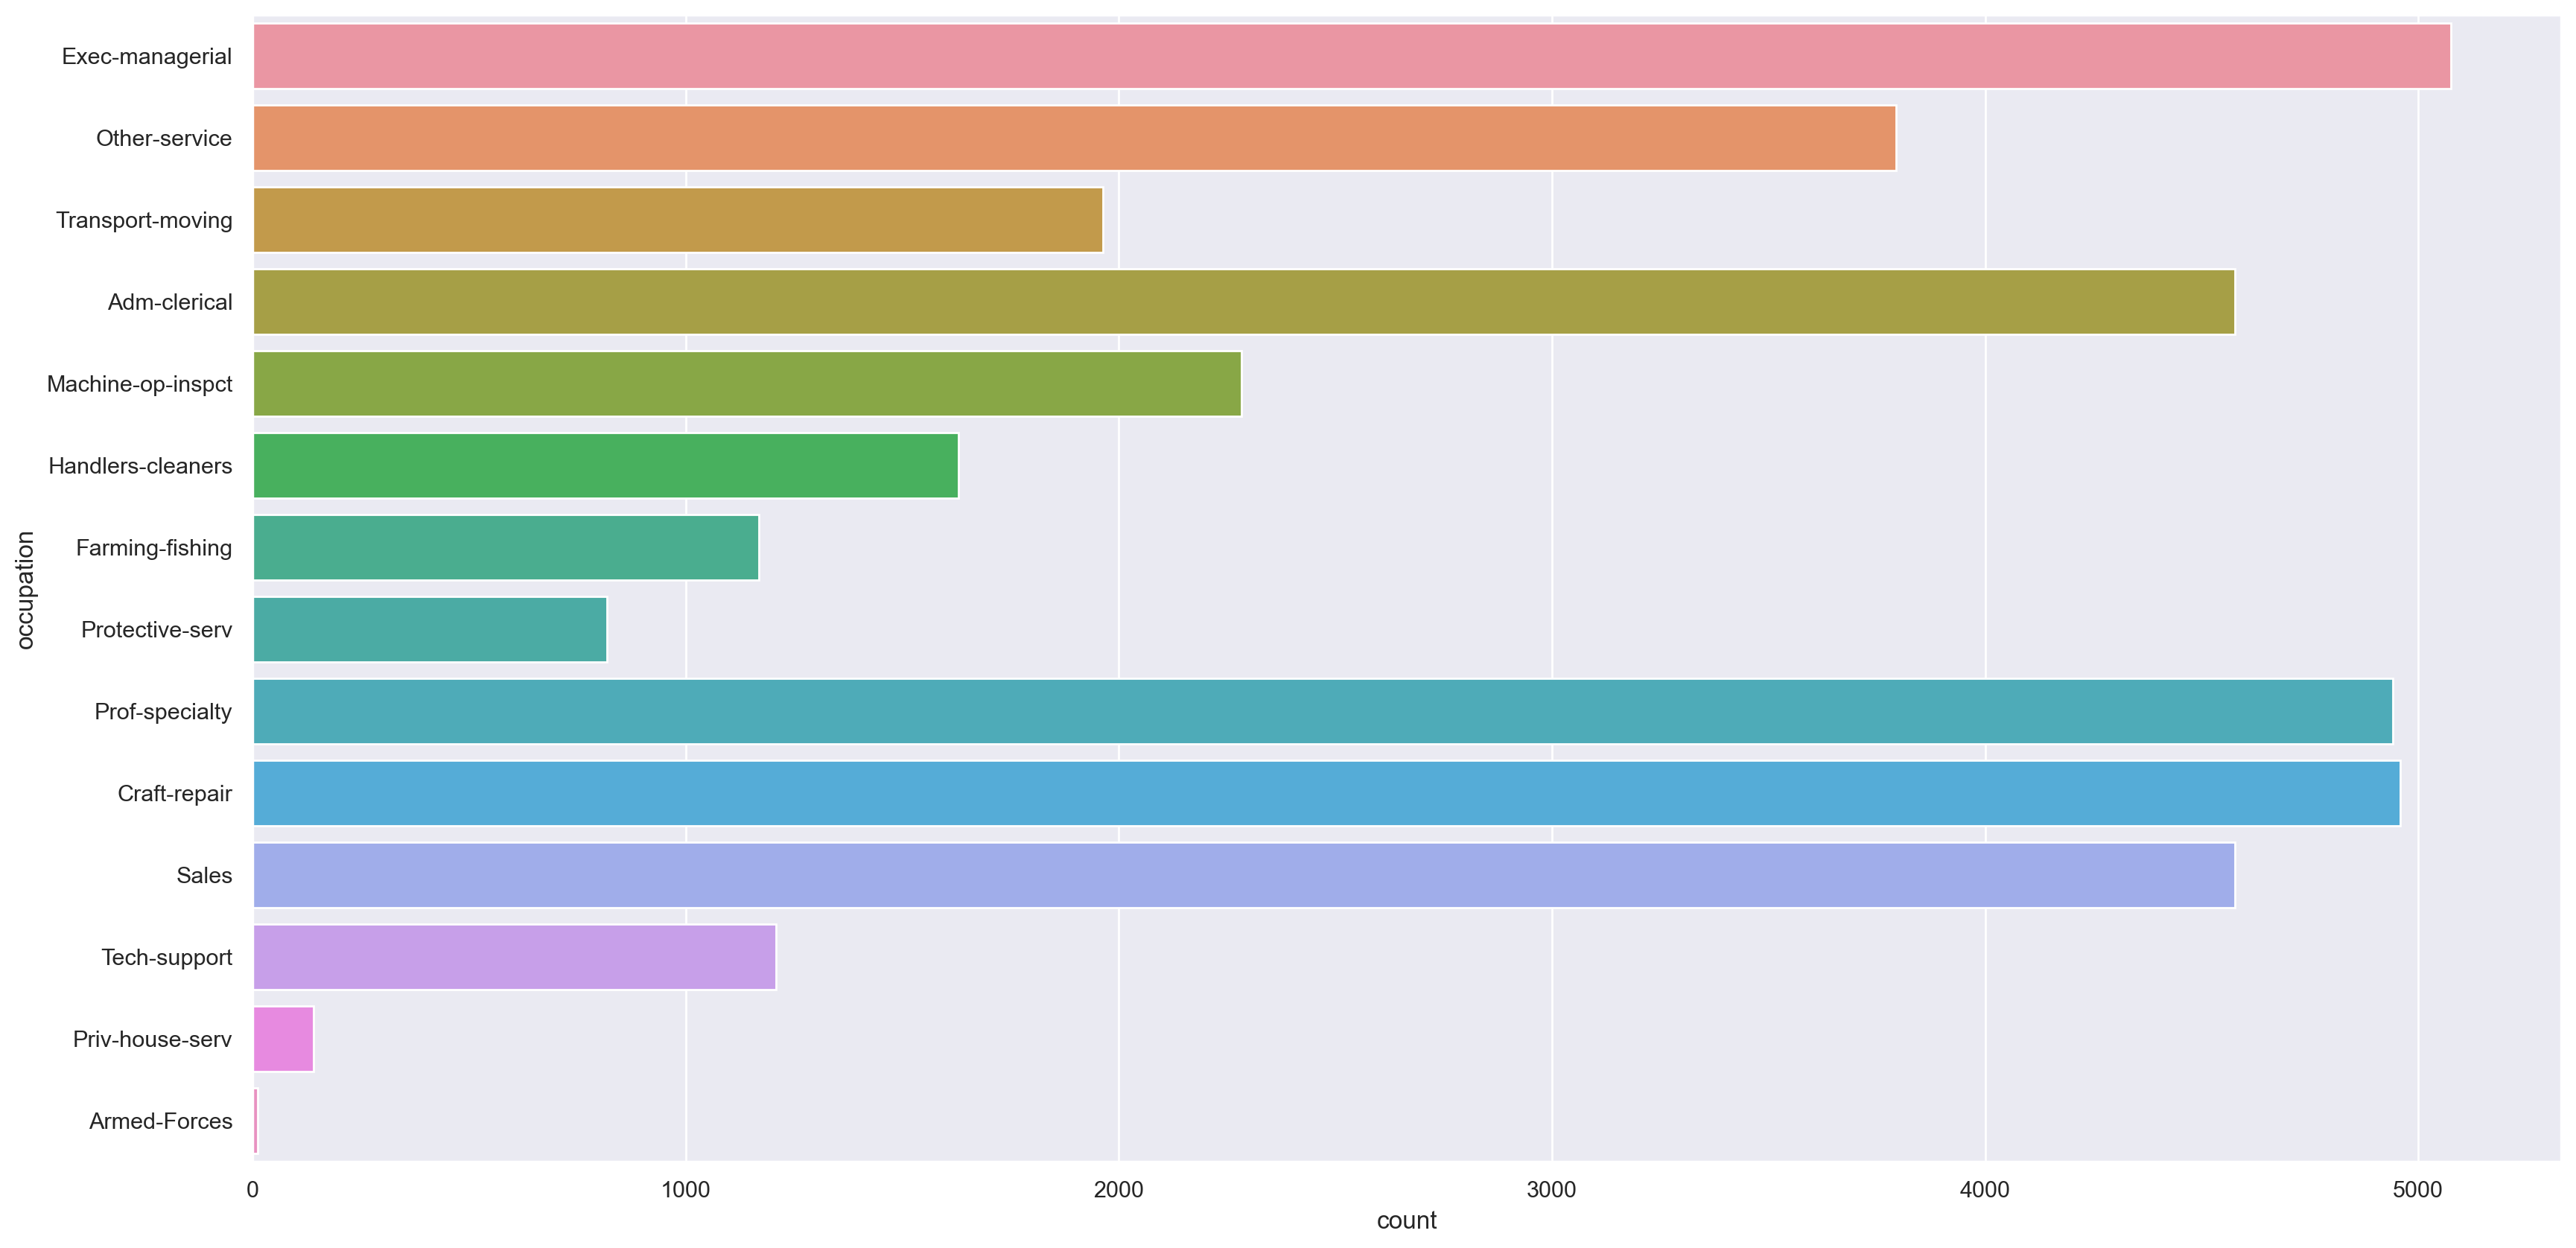

In [44]:
plt.figure(figsize=(20,10)) 
sns.countplot(data= df, y = "occupation")

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39410 entries, 0 to 43956
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              39410 non-null  int64 
 1   workclass        37157 non-null  object
 2   fnlwgt           39410 non-null  int64 
 3   education        39410 non-null  object
 4   educational-num  39410 non-null  int64 
 5   marital-status   39410 non-null  object
 6   occupation       37149 non-null  object
 7   relationship     39410 non-null  object
 8   race             39410 non-null  object
 9   gender           39410 non-null  object
 10  capital-gain     39410 non-null  int64 
 11  capital-loss     39410 non-null  int64 
 12  hours-per-week   39410 non-null  int64 
 13  income_>50K      39410 non-null  int64 
dtypes: int64(7), object(7)
memory usage: 4.5+ MB


3. Split the dataset into categorical and numerical values

In [89]:
df.dropna(subset=['workclass','occupation'],axis=0,inplace=True)
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
income_>50K        0
dtype: int64

In [90]:
#categorical
cat_columns = [ col for col in list(df.columns) if df[col].dtype =='object' and col!= 'label']

cat_columns

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender']

In [91]:
#numberical
num_columns = [ col for col in list(df.columns) if df[col].dtype in ['int64','float64']]
num_columns

['age',
 'fnlwgt',
 'educational-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'income_>50K']

C:\Users\neang.dara\AppData\Local\Temp\ipykernel_1912\2358832978.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


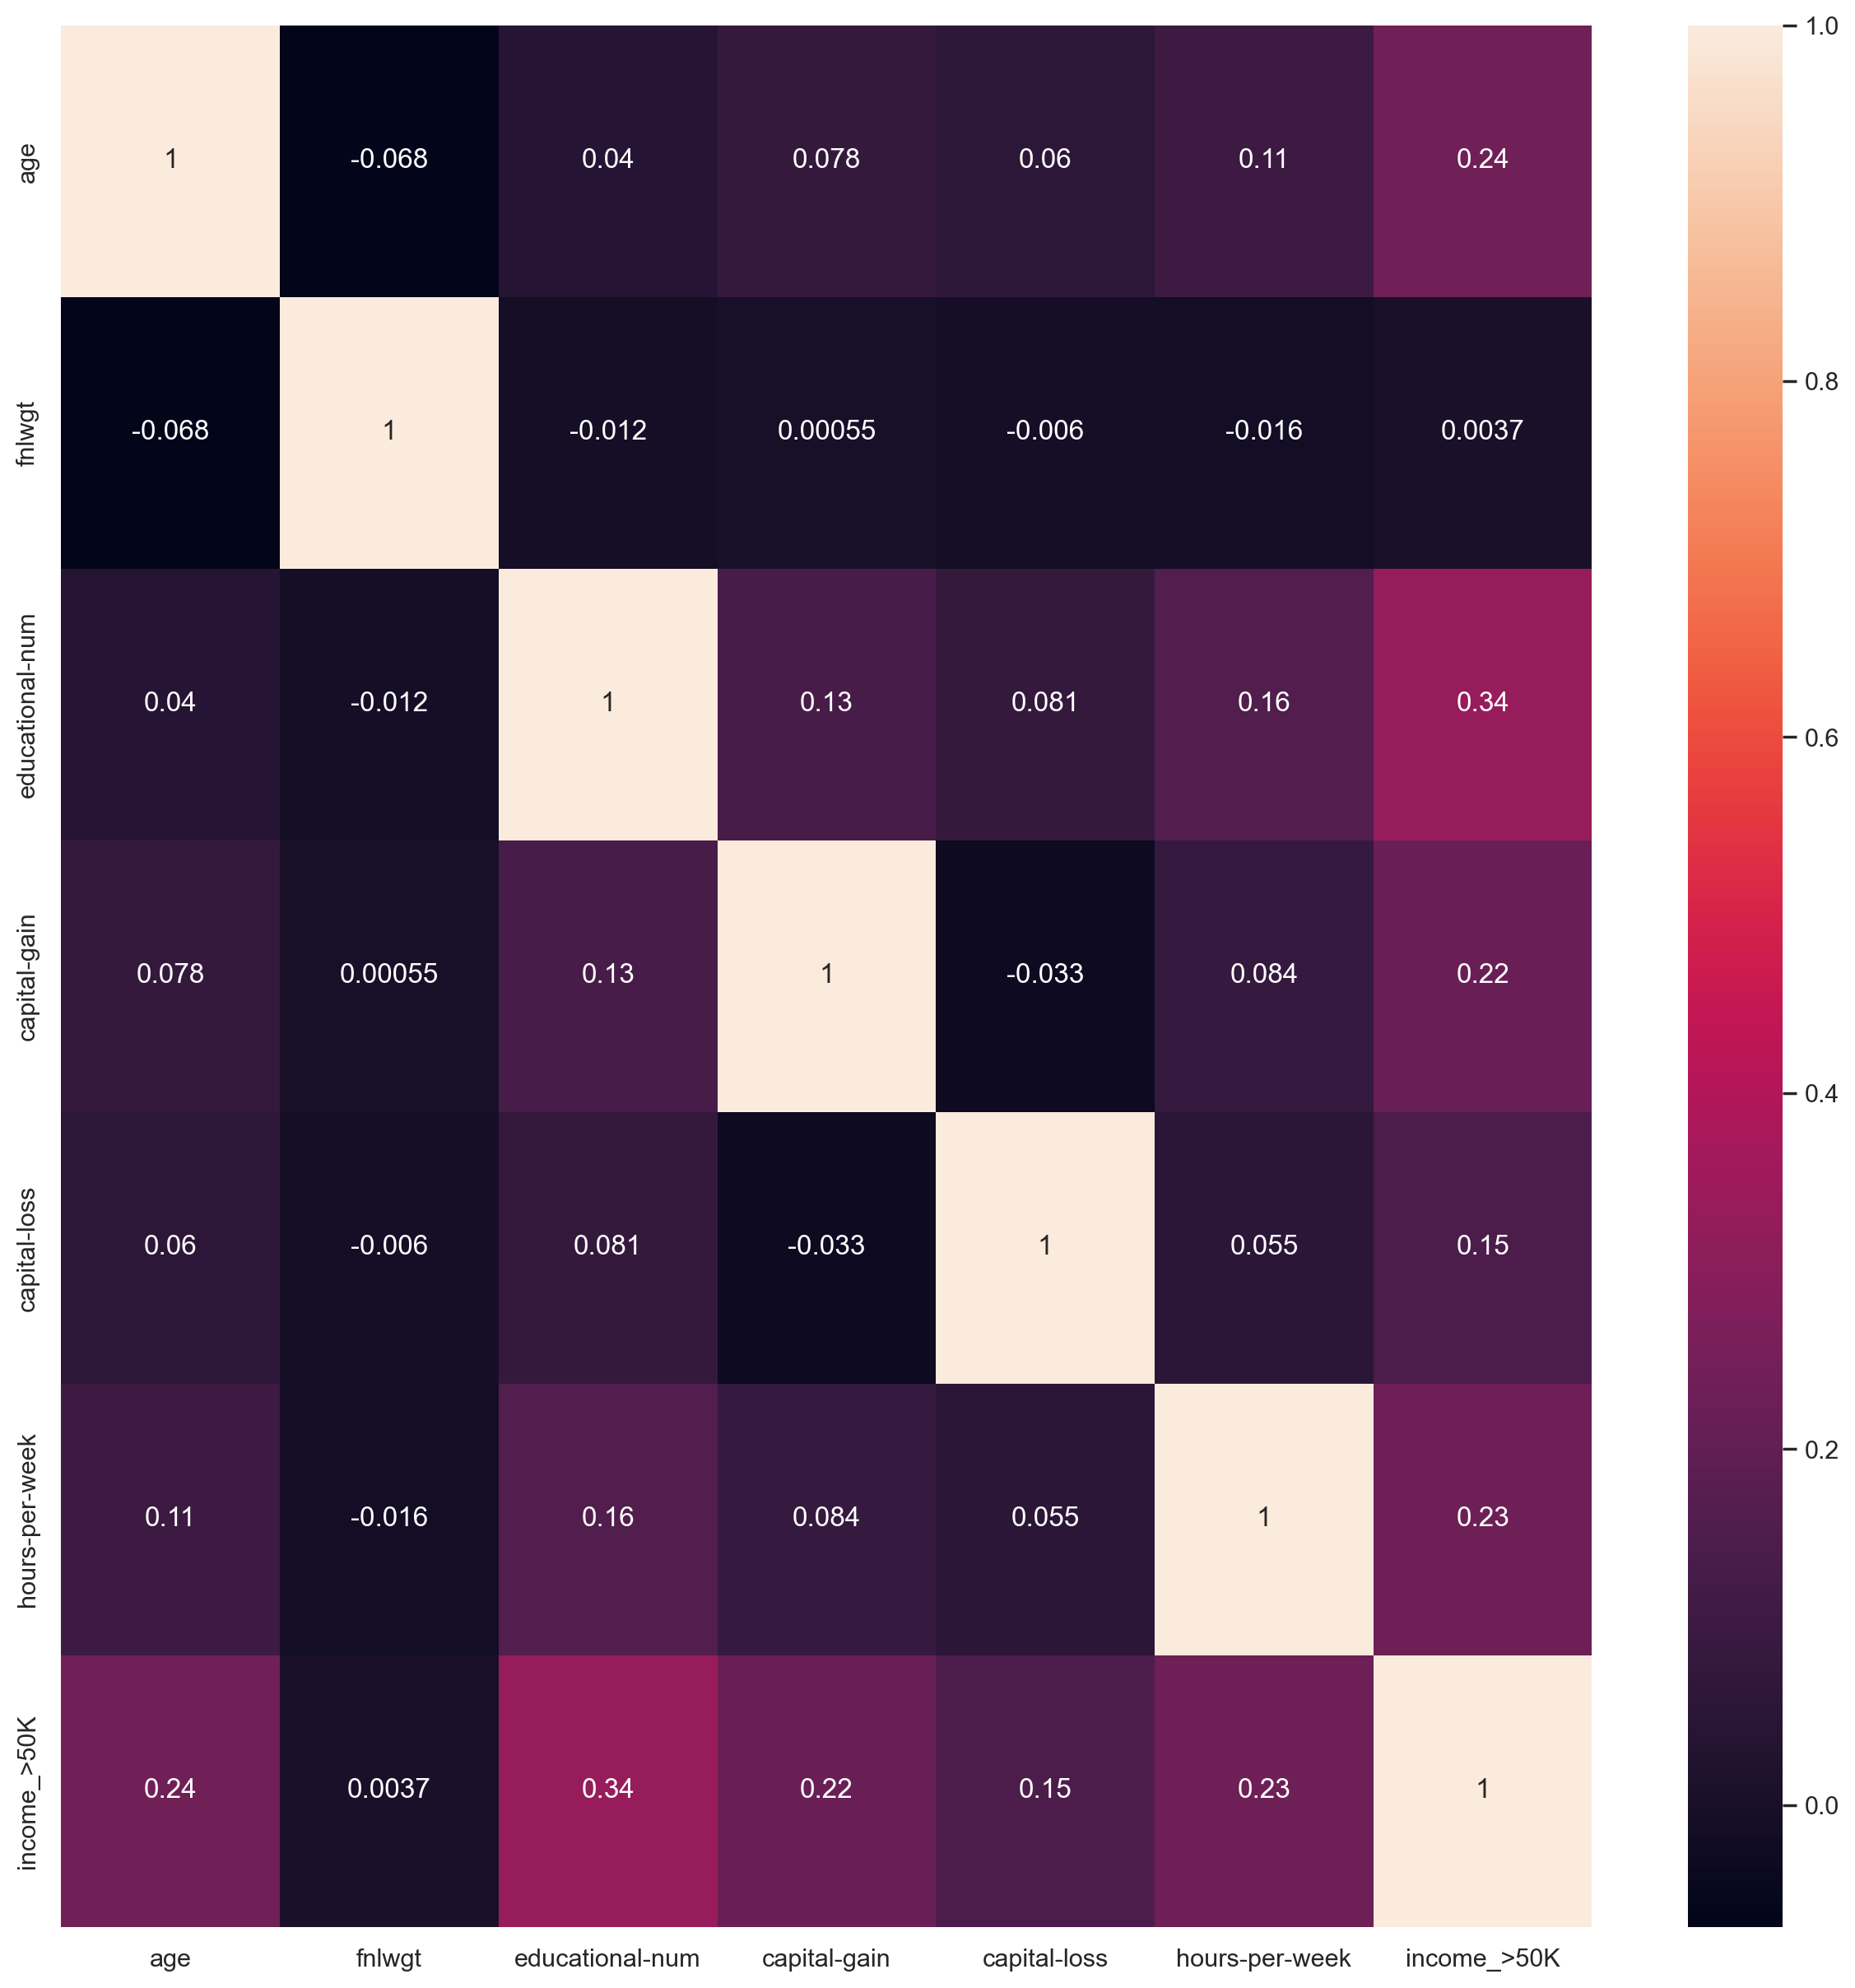

In [49]:
fig= plt.figure(figsize=(15,15))
corr_matrix = df.corr()
sns.heatmap(data=corr_matrix,annot=True)
plt.show()

- Most of the features have positive correlation with target variable except fnlwgt. Even, with other features, it have very low positive or almostly negative correlation. So, we can altogether drop that feature.

- Remember, anything more than 0.5 is consider as strong positive correlation

Note: Ideally, i should have created numerical dataframe and check the correlation matrix. I came to know that after the fact. However, I learned that, heatmap by default consider ONLY numerical variables and excluding categorical variables which is good part.

In [92]:
df.drop(columns='fnlwgt',inplace=True)
df.shape

(37149, 13)

In [93]:
#get dummies
features_df = pd.get_dummies(data=df, columns=cat_columns)
features_df.shape

(37149, 47)

In [94]:
features_df.columns

Index(['age', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'income_>50K', 'workclass_Federal-gov',
       'workclass_Local-gov', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'education_HS-grad', 'education_Preschool',
       'education_elementary-school', 'education_high-school',
       'education_middle-school', 'education_postsecondary-education',
       'marital-status_married', 'marital-status_single',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
       'relationship_Husband', 'relations

## Model

In [106]:
model = RandomForestClassifier(n_estimators=250,random_state=7)
x = features_df.drop('income_>50K',axis=1)
y=df['income_>50K']
model.fit(x,y)

fs = pd.Series(model.feature_importances_,index=x.columns).sort_values(ascending=False)
fs

age                                  0.245296
hours-per-week                       0.121074
capital-gain                         0.112507
educational-num                      0.090734
marital-status_married               0.062458
marital-status_single                0.058474
relationship_Husband                 0.039539
capital-loss                         0.037888
education_postsecondary-education    0.024119
occupation_Exec-managerial           0.018524
occupation_Prof-specialty            0.012991
relationship_Not-in-family           0.011548
relationship_Wife                    0.010821
workclass_Private                    0.009906
workclass_Self-emp-not-inc           0.009005
gender_Female                        0.008695
gender_Male                          0.008099
education_HS-grad                    0.008010
relationship_Own-child               0.007810
relationship_Unmarried               0.007609
occupation_Other-service             0.007429
occupation_Sales                  

In [111]:
fs[fs >.1]

age               0.245296
hours-per-week    0.121074
capital-gain      0.112507
dtype: float64

In [112]:
# Define the feature columns and the target column
feature_cols = ['age', 'hours-per-week', 'capital-gain']
target_col = 'income_>50K'

# Split the data into features and target
X = features_df[feature_cols] #[['educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']]
y = features_df[target_col]

In [113]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the AdaBoostClassifier
adaboost_clf = AdaBoostClassifier(random_state=42)

# Fit the model on the training data
adaboost_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = adaboost_clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7913862718707941


In [114]:
X=df[feature_cols]

In [115]:
test_size = .3
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size,stratify=y,random_state=7)

In [ ]:
algo=[
    [KNeighborsClassifier(n_neighbors=5), 'KNeighborsClassifier'],
    [LogisticRegression(solver='lbfgs'), 'LogisticRegression'],
    [Perceptron(), 'Perceptron'],
    [DecisionTreeClassifier(min_samples_split=10), 'DecisionTreeClassifier'],
    [GradientBoostingClassifier(), 'GradientBoostingClassifier'],
    [RandomForestClassifier(), 'RandomForestClassifier'],
    [BaggingClassifier(), 'BaggingClassifier'],
    [AdaBoostClassifier(), 'AdaBoostClassifier'],
    [GaussianNB(), 'GaussianNB'],
    [MLPClassifier(), 'MLPClassifier'],
    [SVC(kernel='linear'), 'SVC_linear'],
    [GaussianProcessClassifier(), 'GaussianProcessClassifier']
]
model_scores=[]
for a in algo:
    model = a[0]
    model.fit(X_train, y_train)
    score=model.score(X_test, y_test)
    model_scores.append([score, a[1]])
    y_pred=model.predict(X_test)
    print(f'{a[1]:20} score: {score:.04f}')
    print(metrics.confusion_matrix(y_test, y_pred))
    print(metrics.classification_report(y_test, y_pred))
    print('-' * 100)

print(model_scores)
print(f'best score = {max(model_scores)}')

KNeighborsClassifier score: 0.7674
[[7380  939]
 [1653 1173]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      8319
           1       0.56      0.42      0.48      2826

    accuracy                           0.77     11145
   macro avg       0.69      0.65      0.66     11145
weighted avg       0.75      0.77      0.76     11145

----------------------------------------------------------------------------------------------------
LogisticRegression   score: 0.7774
[[7988  331]
 [2150  676]]
              precision    recall  f1-score   support

           0       0.79      0.96      0.87      8319
           1       0.67      0.24      0.35      2826

    accuracy                           0.78     11145
   macro avg       0.73      0.60      0.61     11145
weighted avg       0.76      0.78      0.74     11145

----------------------------------------------------------------------------------------------------
Perceptron          